## Attrition:- ***company losing its customer base***

**Attrition is a process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.**
- A reduction in staff due to attrition is often called a hiring freeze and is seen as a less disruptive way to trim the workforce and reduce payroll than layoffs
- In this NoteBook our Aim will be to analyze the dfsets completely wrt each and feature and find the reasin behind Attrition of Employees.
- And what the top factors which lead to employee attrition?

### Description of the Dataset
- Age: The age of the employee, measured in years.
- Attrition: Indicates whether the employee has left the organization (Yes) or not (No).
- BusinessTravel: Describes the frequency of the employee’s business travel (Travel_Rarely, Travel_Frequently, or Non-Travel).
- DailyRate: The daily wage of the employee based on their monthly salary divided by calendar days.
- Department: The department where the employee works (e.g., Sales, Research & Development, Human Resources).
- DistanceFromHome: The distance (in miles or kilometers) from the employee’s residence to the workplace.
- Education: The education level of the employee:
- 1: Below College
- 2: College
- 3: Bachelor
- 4: Master
- 5: Doctorate
- EducationField: The field of study in which the employee completed their education (e.g., Life Sciences, Medical, Technical Degree).
- EmployeeCount: Represents the count of employees (value is constant and should be removed for analysis).
- EmployeeNumber: A unique identifier for each employee (used for internal tracking but not predictive of attrition).
- EnvironmentSatisfaction: Employee satisfaction with the workplace environment:
- 1: Low
- 2: Medium
- 3: High
- 4: Very High
- Gender: The gender of the employee (Male or Female).
- HourlyRate: The hourly wage of the employee.
- JobInvolvement: Indicates the level of employee engagement in their work:
- 1: Low
- 2: Medium
- 3: High
- 4: Very High
- JobLevel: The level or grade of the employee's job, representing seniority and pay scale.
- JobRole: The job position of the employee (e.g., Sales Executive, Research Scientist, Manager).
- JobSatisfaction: Employee’s satisfaction with their job:
- 1: Low
- 2: Medium
- 3: High
- 4: Very High
- MaritalStatus: The marital status of the employee (Single, Married, Divorced).
- MonthlyIncome: The total monthly earnings of the employee.
- MonthlyRate: The monthly payment rate for the employee.
- NumCompaniesWorked: The number of companies the employee has worked for before the current organization.
- Over18: Indicates if the employee is over 18 years old (value is constant and can be removed for analysis).
- OverTime: Indicates whether the employee works overtime (Yes or No).
- PercentSalaryHike: The percentage increase in the employee’s salary compared to the previous year.
- PerformanceRating: The employee’s performance evaluation:
- 1: Low
- 2: Good
- 3: Excellent
- 4: Outstanding
- RelationshipSatisfaction: Employee’s satisfaction with their relationships at work:
- 1: Low
- 2: Medium
- 3: High
- 4: Very High
- StandardHours: Standard work hours (value is constant and should be removed for analysis).
- StockOptionLevel: The stock option level provided to the employee:
- 0: None
- 1: Low
- 2: Medium
- 3: High
- TotalWorkingYears: The total number of years the employee has worked across all organizations.
- TrainingTimesLastYear: The number of training sessions the employee attended in the last year.
- WorkLifeBalance: The employee’s perception of work-life balance:
- 1: Bad
- 2: Good
- 3: Better
- 4: Best
- YearsAtCompany: The number of years the employee has worked at the current organization.
- YearsInCurrentRole: The number of years the employee has worked in their current role.
- YearsSinceLastPromotion: The number of years since the employee’s last promotion.
- YearsWithCurrManager: The number of years the employee has worked with their current manager.

<h2>Some Python Libraries</h2>

<p style="text-align: justify;">In the first place, Let's define some libraries to help us in the manipulation the df set, such as `pandas`, `numpy`, `matplotlib`, `seaborn`. In this tutorial, we are implementing a Logistic Regression with `sikit-learn`. The goal here is to be as simple as possible! So to help you with this task, we implementing the Logistic regression using ready-made libraries and their functinality.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Collection

In [2]:
# Load the dataset 
data = pd.read_csv('Employee-Attrition.csv')

# Display basic dataset information
print("Dataset Shape:", data.shape)
print("Columns in Dataset:", data.columns)
print("Sample Data:\n", data.head())

Dataset Shape: (1470, 35)
Columns in Dataset: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Sample Data:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37 

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Exploration

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [5]:
# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [6]:
mask=data['Attrition']=='Yes'
data[mask].count()

Age                         237
Attrition                   237
BusinessTravel              237
DailyRate                   237
Department                  237
DistanceFromHome            237
Education                   237
EducationField              237
EmployeeCount               237
EmployeeNumber              237
EnvironmentSatisfaction     237
Gender                      237
HourlyRate                  237
JobInvolvement              237
JobLevel                    237
JobRole                     237
JobSatisfaction             237
MaritalStatus               237
MonthlyIncome               237
MonthlyRate                 237
NumCompaniesWorked          237
Over18                      237
OverTime                    237
PercentSalaryHike           237
PerformanceRating           237
RelationshipSatisfaction    237
StandardHours               237
StockOptionLevel            237
TotalWorkingYears           237
TrainingTimesLastYear       237
WorkLifeBalance             237
YearsAtC

In [7]:
mask=data['Attrition']=='No'
data[mask].count()

Age                         1233
Attrition                   1233
BusinessTravel              1233
DailyRate                   1233
Department                  1233
DistanceFromHome            1233
Education                   1233
EducationField              1233
EmployeeCount               1233
EmployeeNumber              1233
EnvironmentSatisfaction     1233
Gender                      1233
HourlyRate                  1233
JobInvolvement              1233
JobLevel                    1233
JobRole                     1233
JobSatisfaction             1233
MaritalStatus               1233
MonthlyIncome               1233
MonthlyRate                 1233
NumCompaniesWorked          1233
Over18                      1233
OverTime                    1233
PercentSalaryHike           1233
PerformanceRating           1233
RelationshipSatisfaction    1233
StandardHours               1233
StockOptionLevel            1233
TotalWorkingYears           1233
TrainingTimesLastYear       1233
WorkLifeBa

C:\Users\UAS\AppData\Local\Temp\ipykernel_9848\1450975896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='Set2')  # Creates a bar chart for the 'Attrition' column with colorful bars.


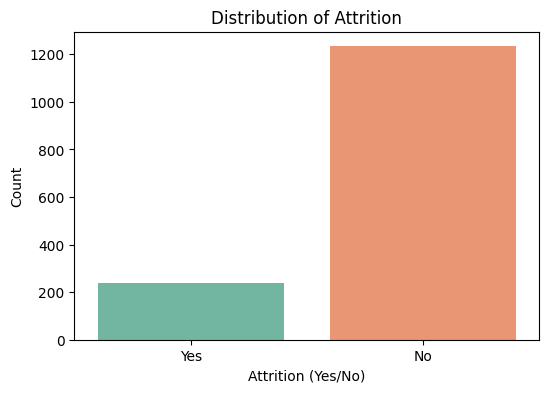

In [8]:

# Distribution of the target variable (Attrition)
plt.figure(figsize=(6, 4))  # Sets the plot size to 6 inches wide and 4 inches tall.
sns.countplot(x='Attrition', data=data, palette='Set2')  # Creates a bar chart for the 'Attrition' column with colorful bars.
plt.title('Distribution of Attrition')  # Adds a title to the chart.
plt.xlabel('Attrition (Yes/No)')  # Labels the x-axis as "Attrition (Yes/No)".
plt.ylabel('Count')  # Labels the y-axis as "Count".
plt.show()  # Displays the chart.


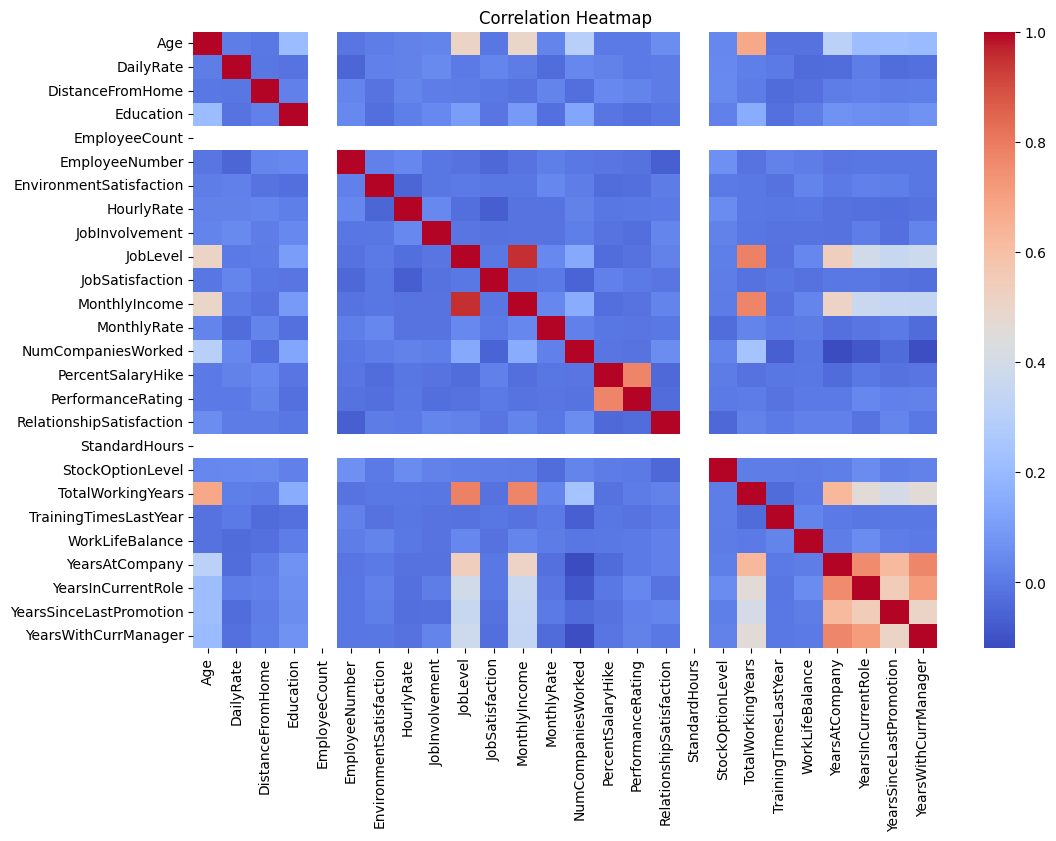

In [9]:
# Correlation heatmap
correlation_matrix = data.corr(numeric_only=True)  # Calculates the correlation matrix for numeric columns in the DataFrame.
plt.figure(figsize=(12, 8))  # Sets the size of the plot to 12 inches wide and 8 inches tall.
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Creates a heatmap to visualize correlations with a cool-to-warm color scheme.
plt.title('Correlation Heatmap')  # Adds a title to the heatmap: "Correlation Heatmap".
plt.show()  # Displays the heatmap.

### Data Preprocessing and Feature Engineering

In [10]:
from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class for scaling numerical data.

# Drop irrelevant columns
irrelevant_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']  # List of columns that are not needed.
data_cleaned = data.drop(columns=irrelevant_columns)  # Removes the irrelevant columns from the dataset.

# Encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Converts categorical variables into dummy/one-hot encoded columns.

# Scale numerical features
scaler = MinMaxScaler()  # Creates an instance of the MinMaxScaler to scale data between 0 and 1.
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns  # Selects only numeric columns in the dataset.
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])  # Scales the numeric columns using MinMaxScaler.

# Save the cleaned dataset
cleaned_file_path = 'Cleaned_Employee_Attrition.csv'  # Sets the file path where the cleaned dataset will be saved.
data_encoded.to_csv(cleaned_file_path, index=False)  # Saves the cleaned and transformed dataset as a CSV file without the index.
print(f"\nCleaned dataset saved to {cleaned_file_path}")  # Prints a message confirming the dataset was saved.



Cleaned dataset saved to Cleaned_Employee_Attrition.csv



### Read The Cleanded DataSet

In [11]:
df=pd.read_csv('Cleaned_HR_Employee_Attrition.csv')

### Visualizations

<Figure size 1500x1000 with 0 Axes>

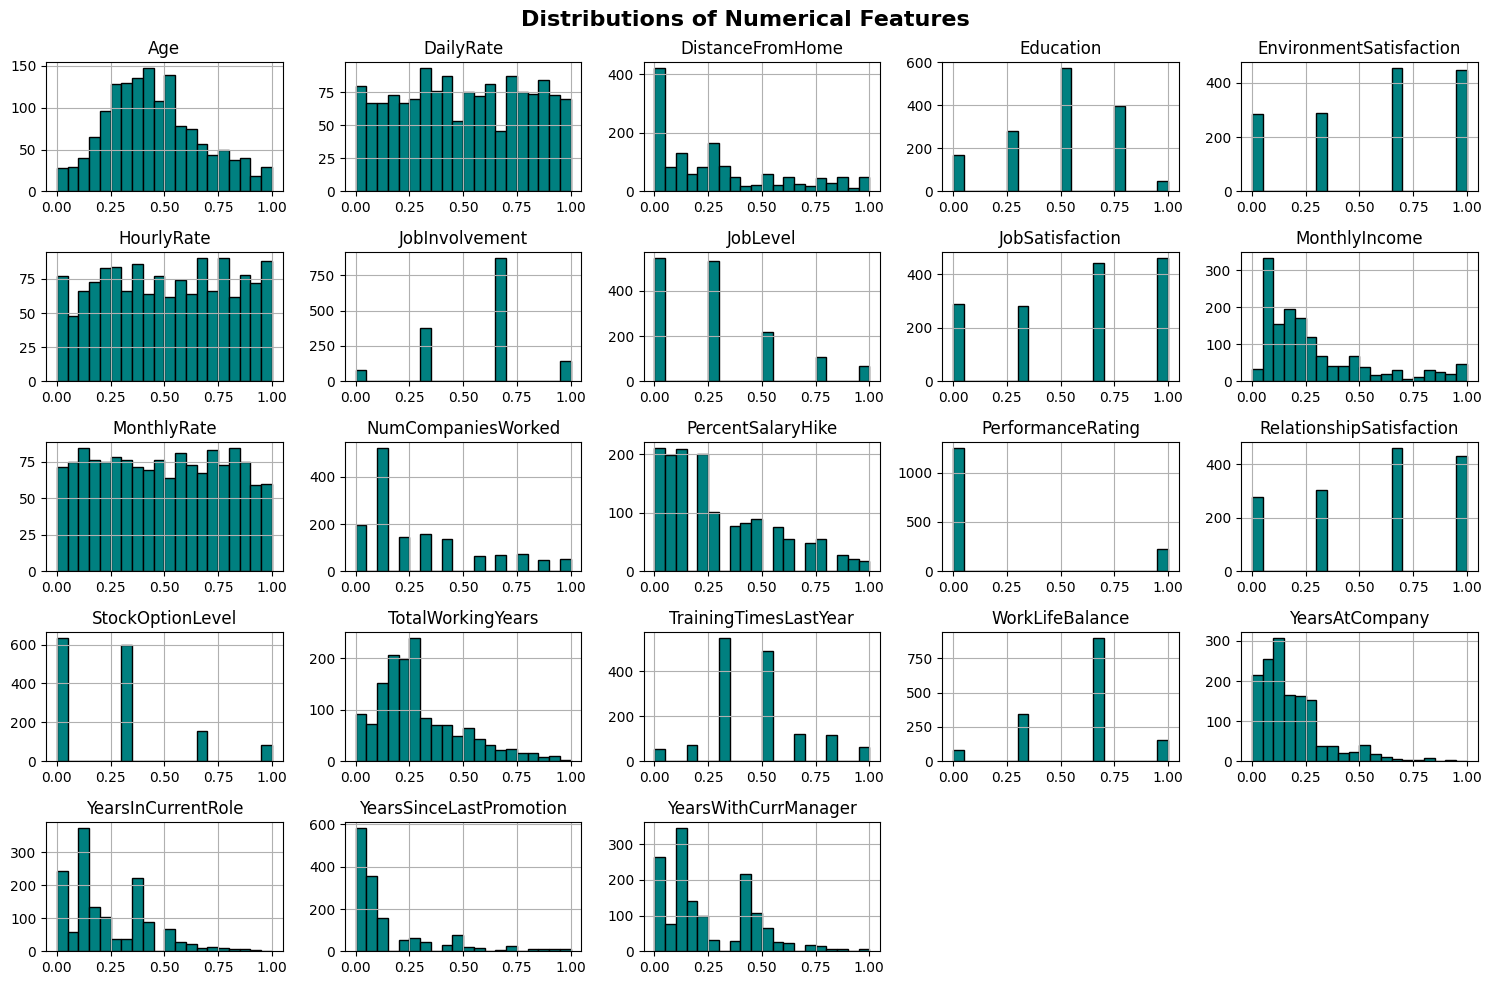

In [12]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))  # Sets the size of the overall figure to 15 inches wide and 10 inches tall.
data_encoded[numerical_columns].hist(  
    bins=20,            # Divides the range of each numerical feature into 20 bins (intervals).
    color='teal',       # Sets the fill color of the bars to teal.
    edgecolor='black',  # Adds a black outline to each bar for better visibility.
    figsize=(15, 10)    # Specifies the size of the individual plots (same as the overall figure size).
)

# Add a title for the overall plot
plt.suptitle('Distributions of Numerical Features', fontsize=16, fontweight='bold')  # Adds a title to the entire figure with bold, large font.
plt.tight_layout()  # Adjusts the spacing between plots to avoid overlap between titles, axes, and labels.
plt.show()  # Displays the plots.


C:\Users\UAS\AppData\Local\Temp\ipykernel_9848\772660001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette='cool')


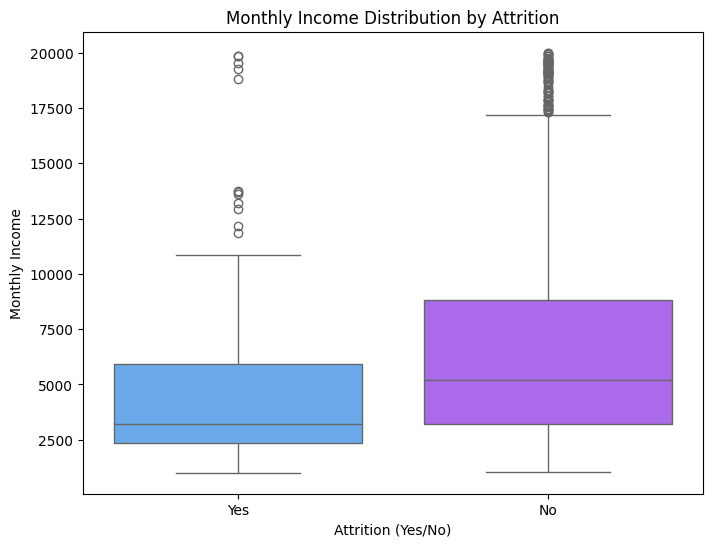

In [13]:
# Box plot for Monthly Income by Attrition
plt.figure(figsize=(8, 6))  # Sets the size of the plot to 8 inches wide and 6 inches tall.
sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette='cool')  
# Creates a boxplot to compare the distribution of 'MonthlyIncome' for each category in 'Attrition'.
# Uses the 'cool' color palette for styling.

plt.title('Monthly Income Distribution by Attrition')  # Adds a title to the plot.
plt.xlabel('Attrition (Yes/No)')  # Labels the x-axis as "Attrition (Yes/No)".
plt.ylabel('Monthly Income')  # Labels the y-axis as "Monthly Income".
plt.show()  # Displays the plot.

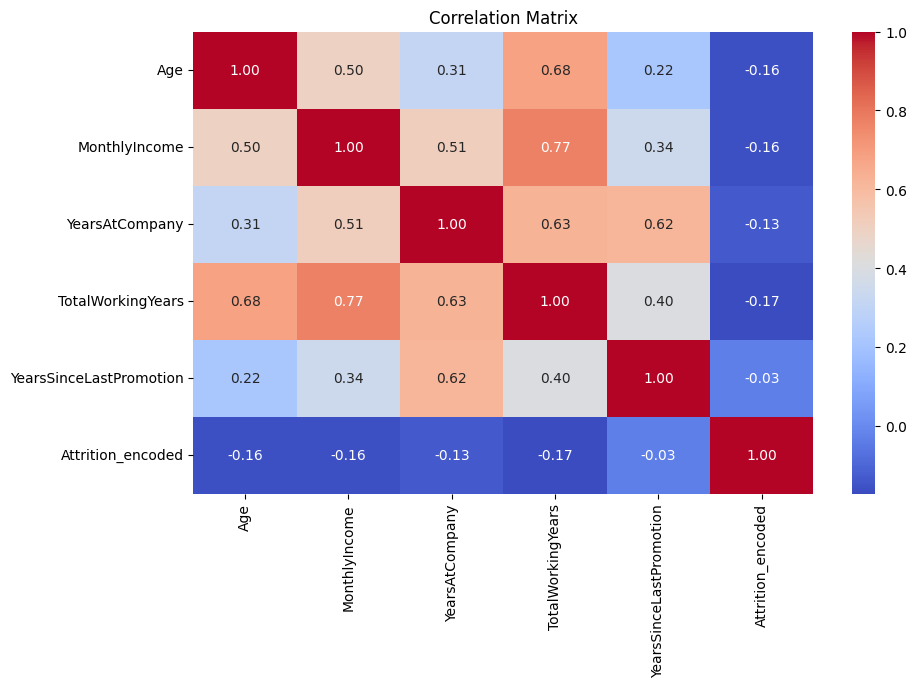

In [14]:
# Select numerical columns
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']  
# Specifies a list of numerical columns to analyze.

# Calculate correlations with Attrition (encoded as 0/1)
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})  
# Converts the 'Attrition' column into numeric values (1 for 'Yes' and 0 for 'No').
correlation = df[numerical_cols + ['Attrition_encoded']].corr()  
# Calculates the correlation matrix for the selected numerical columns and the encoded 'Attrition' column.

# Plot heatmap
plt.figure(figsize=(10, 6))  # Sets the size of the heatmap to 10 inches wide and 6 inches tall.
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')  
# Creates a heatmap to visualize the correlations. 
# The `annot=True` adds the correlation values on the heatmap, `cmap='coolwarm'` sets the color scheme, and `fmt='.2f'` formats the numbers to 2 decimal places.

plt.title('Correlation Matrix')  # Adds a title to the heatmap: "Correlation Matrix".
plt.show()  # Displays the heatmap.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

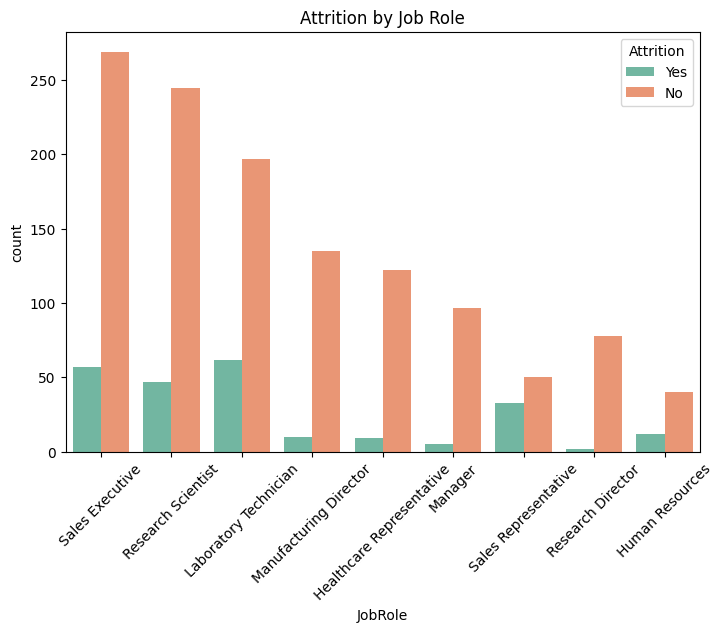

In [15]:
# Attrition by JobRole
plt.figure(figsize=(18, 12))  # Sets the overall size of the figure to 18 inches wide and 12 inches tall.

plt.subplot(2, 2, 1)  # Creates a subplot in a 2x2 grid (2 rows, 2 columns) and places this plot in the first position.

sns.countplot(data=df, x="JobRole", hue="Attrition", palette="Set2")  # Creates a bar chart showing the count of employees in each "JobRole," with bars split by "Attrition" (Yes/No) using different colors.

plt.title("Attrition by Job Role")  # Adds a title to the chart: "Attrition by Job Role."

plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better readability.

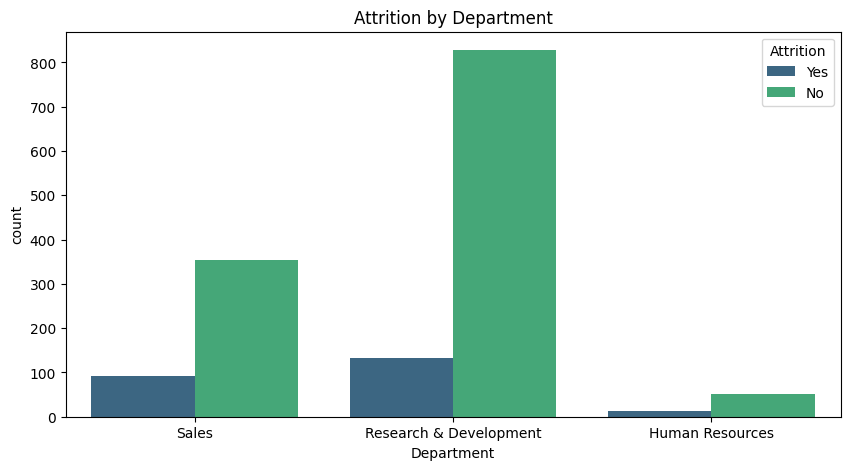

In [16]:
# Plotting Attrition by Department with value labels
plt.figure(figsize=(10, 5))  # Sets the size of the figure to 10 inches wide and 5 inches tall.

sns.countplot(x='Department', hue='Attrition', data=df, palette='viridis')  
# Creates a bar chart to show the count of employees in each "Department," with bars split by "Attrition" (Yes/No), using the 'viridis' color palette.

plt.title('Attrition by Department')  # Adds a title to the chart: "Attrition by Department."

plt.show()  # Displays the plot.

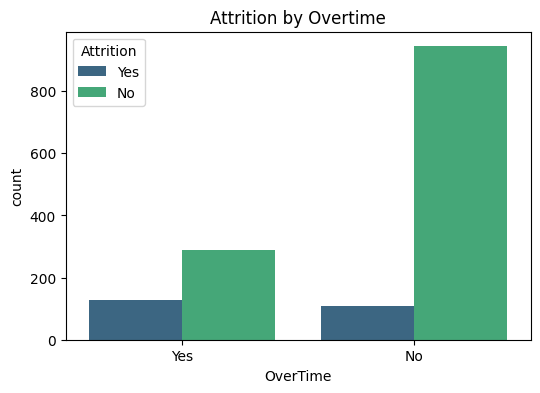

In [17]:
# Plotting Attrition by Overtime Status with value labels
plt.figure(figsize=(6, 4))  # Sets the size of the figure to 6 inches wide and 4 inches tall.

sns.countplot(x='OverTime', hue='Attrition', data=df, palette='viridis')  
# Creates a bar chart to show the count of employees with or without overtime, split by "Attrition" (Yes/No), using the 'viridis' color palette.

plt.title('Attrition by Overtime')  # Adds a title to the chart: "Attrition by Overtime."

plt.show()  # Displays the plot.

In [18]:
# Select only numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['int64', 'float64'])# Selects only the columns with numeric data types (int64 and float64) from the dataframe.


numerical_data.head()  # Preview numerical data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


## Advanced Data Analysis

### t-Tests

In [19]:
attrition_yes = data[data['Attrition'] == 'Yes']  
# Creates a new dataframe 'attrition_yes' that includes only rows where the 'Attrition' column is 'Yes'.

attrition_no = data[data['Attrition'] == 'No']  
# Creates a new dataframe 'attrition_no' that includes only rows where the 'Attrition' column is 'No'.

In [20]:
from scipy.stats import ttest_ind  # Imports the t-test function for comparing two groups.

numerical_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany']  # List of columns to test.

t_test_results = {}  # Creates an empty dictionary to store test results.

for column in numerical_columns:  # Loops through each numerical column.
    t_stat, p_value = ttest_ind(attrition_yes[column], attrition_no[column], equal_var=False)  # Performs a t-test comparing two groups (attrition_yes and attrition_no) for the column.
    t_test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}  # Stores the t-statistic and p-value in the results dictionary.

print(t_test_results)  # Prints the t-test results for each column.

{'Age': {'t_statistic': np.float64(-5.82801185398895), 'p_value': np.float64(1.3797600649439775e-08)}, 'MonthlyIncome': {'t_statistic': np.float64(-7.482621586644742), 'p_value': np.float64(4.433588628286071e-13)}, 'YearsAtCompany': {'t_statistic': np.float64(-5.282596058921782), 'p_value': np.float64(2.2859051752725147e-07)}}


### Chi-Squared Test


In [21]:
contingency_table = pd.crosstab(data['JobRole'], data['Attrition'])  # Creates a table to show the relationship between 'JobRole' and 'Attrition'.

In [22]:
from scipy.stats import chi2_contingency  # Imports the chi-squared test function to check relationships between categorical variables.

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)  # Performs the chi-squared test on the contingency table to check if there's a significant relationship.

print(f"Chi-Squared Statistic: {chi2_stat}, p-value: {p_value}")  # Prints the chi-squared statistic and p-value.

Chi-Squared Statistic: 86.19025367670434, p-value: 2.7524816380506567e-15


In [23]:
categorical_columns = ['JobRole', 'MaritalStatus', 'OverTime']  # List of categorical columns to test.

chi_squared_results = {}  # Creates an empty dictionary to store chi-squared results.

for column in categorical_columns:  # Loops through each categorical column.
    contingency_table = pd.crosstab(data[column], data['Attrition'])  # Creates a contingency table for the current column and 'Attrition'.
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)  # Performs the chi-squared test and gets the chi-squared statistic and p-value.
    chi_squared_results[column] = {'chi2_statistic': chi2_stat, 'p_value': p_value}  # Stores the chi-squared statistic and p-value in the dictionary.

print(chi_squared_results)  # Prints the chi-squared test results for each column.

{'JobRole': {'chi2_statistic': np.float64(86.19025367670434), 'p_value': np.float64(2.7524816380506567e-15)}, 'MaritalStatus': {'chi2_statistic': np.float64(46.163676540848705), 'p_value': np.float64(9.455511060340833e-11)}, 'OverTime': {'chi2_statistic': np.float64(87.56429365828768), 'p_value': np.float64(8.158423721538322e-21)}}



### ANOVA

In [24]:
groups = [group['MonthlyIncome'] for _, group in data.groupby('JobRole')]  
# Creates a list of 'MonthlyIncome' values grouped by 'JobRole', where each group corresponds to a specific job role.

In [25]:
from scipy.stats import f_oneway  # Imports the one-way ANOVA test function.

f_stat, p_value = f_oneway(*groups)  # Performs the ANOVA test to compare 'MonthlyIncome' between different 'JobRole' groups and gets the F-statistic and p-value.

print("F-Statistic:", f_stat)  # Prints the F-statistic, which measures the variance between groups.
print("P-Value:", p_value)  # Prints the p-value, which indicates the significance of the result.

F-Statistic: 810.2140539160143
P-Value: 0.0


In [26]:
numerical_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany']  # List of numerical columns to test using ANOVA.

anova_results = {}  # Creates an empty dictionary to store ANOVA results.

for column in numerical_columns:  # Loops through each numerical column.
    groups = [group[column].dropna() for _, group in data.groupby('JobRole')]  # Creates groups based on 'JobRole' and drops missing values for the current column.
    f_stat, p_value = f_oneway(*groups)  # Performs the one-way ANOVA test and calculates the F-statistic and p-value.
    anova_results[column] = {'F-Statistic': f_stat, 'P-Value': p_value}  # Stores the results in the dictionary.

print(anova_results)  # Prints the ANOVA results for each column.

{'Age': {'F-Statistic': np.float64(42.41652317125514), 'P-Value': np.float64(2.464075085557381e-61)}, 'MonthlyIncome': {'F-Statistic': np.float64(810.2140539160143), 'P-Value': np.float64(0.0)}, 'YearsAtCompany': {'F-Statistic': np.float64(44.68548448284975), 'P-Value': np.float64(1.83415995200809e-64)}}


## Feature Engineering

In [27]:
df['PromotionStagnation'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1e-6)
# Creates a new column 'PromotionStagnation' by dividing 'YearsSinceLastPromotion' by 'YearsAtCompany', adding a small value (1e-6) to avoid division by zero.

C:\Users\UAS\AppData\Local\Temp\ipykernel_9848\1356050639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


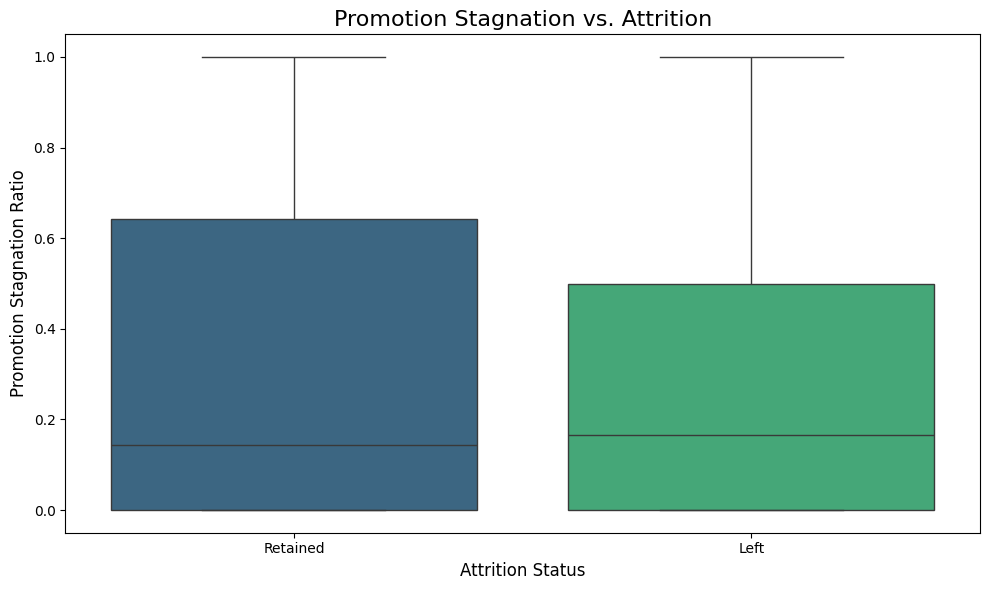

In [28]:
plt.figure(figsize=(10, 6))  # Sets the size of the plot.

sns.boxplot(
    x='Attrition',  # The x-axis represents 'Attrition' (whether employees left or stayed).
    y='PromotionStagnation',  # The y-axis represents the 'PromotionStagnation' ratio.
    data=df,  # Uses the 'df' DataFrame for the data.
    palette='viridis',  # Sets the color palette to 'viridis'.
    showfliers=False  # Hides outliers to focus on the main data points.
)

plt.title('Promotion Stagnation vs. Attrition', fontsize=16)  # Adds a title to the plot with a specific font size.
plt.xlabel('Attrition Status', fontsize=12)  # Labels the x-axis as 'Attrition Status' with a specific font size.
plt.ylabel('Promotion Stagnation Ratio', fontsize=12)  # Labels the y-axis as 'Promotion Stagnation Ratio' with a specific font size.
plt.xticks(ticks=[0, 1], labels=['Retained', 'Left'])  # Sets custom labels for the x-axis ticks (0: Retained, 1: Left).
plt.tight_layout()  # Adjusts the layout to avoid overlap of elements.
plt.show()  # Displays the plot.

In [29]:
df['WorkLifeStress'] = df['OverTime'].map({'Yes': 1, 'No': 0}) * (5 - df['WorkLifeBalance'])  
# Creates a new column 'WorkLifeStress', where stress is higher for overtime workers with lower work-life balance (mapping 'Yes' to 1 and 'No' to 0).

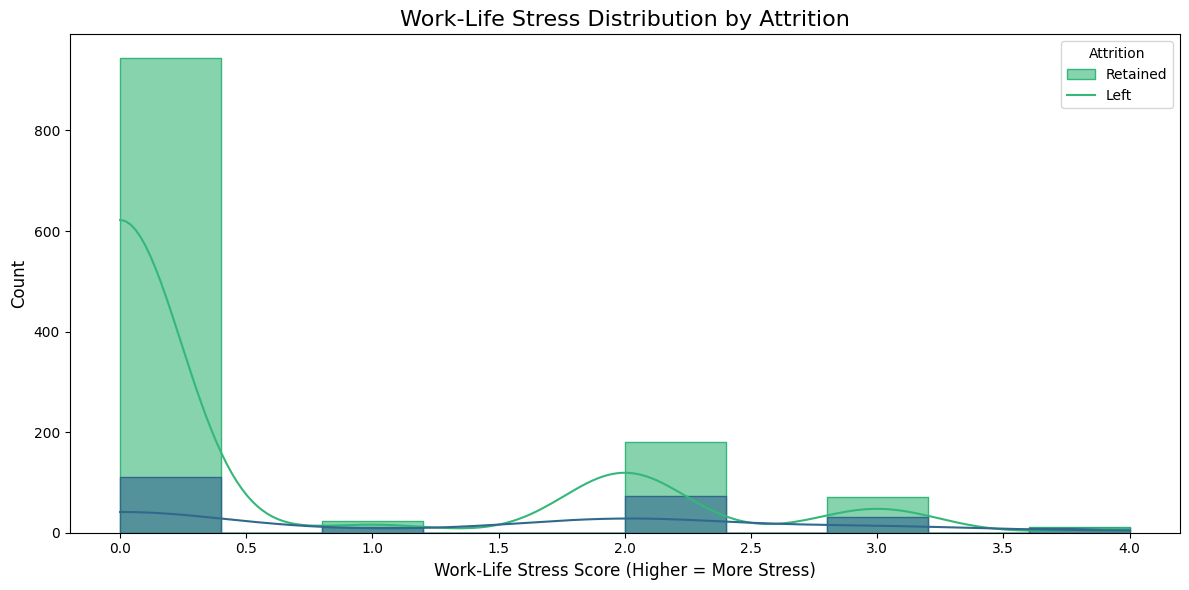

In [30]:
plt.figure(figsize=(12, 6))  # Sets the size of the plot.

sns.histplot(
    data=df,  # Uses the 'df' DataFrame for the data.
    x='WorkLifeStress',  # The x-axis represents the 'WorkLifeStress' column.
    hue='Attrition',  # Groups the data by 'Attrition' (whether the employee left or stayed).
    element='step',  # Creates a step plot instead of a solid fill for the histogram.
    bins=10,  # Divides the data into 10 bins.
    kde=True,  # Adds a Kernel Density Estimate (KDE) to show the smooth distribution.
    palette='viridis',  # Sets the color palette to 'viridis'.
    alpha=0.6  # Adjusts the transparency of the plot.
)

plt.title('Work-Life Stress Distribution by Attrition', fontsize=16)  # Adds a title to the plot with a specific font size.
plt.xlabel('Work-Life Stress Score (Higher = More Stress)', fontsize=12)  # Labels the x-axis with a specific font size.
plt.ylabel('Count', fontsize=12)  # Labels the y-axis with a specific font size.
plt.legend(title='Attrition', labels=['Retained', 'Left'])  # Adds a legend with custom labels.
plt.tight_layout()  # Adjusts the layout to avoid overlap of elements.
plt.show()  # Displays the plot.

In [31]:
df['TenureToIncome'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1e-6)  
# Creates a new column 'TenureToIncome', which is the ratio of Monthly Income to Years at Company. Adding 1e-6 avoids division by zero when YearsAtCompany is zero.

C:\Users\UAS\AppData\Local\Temp\ipykernel_9848\1069820204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


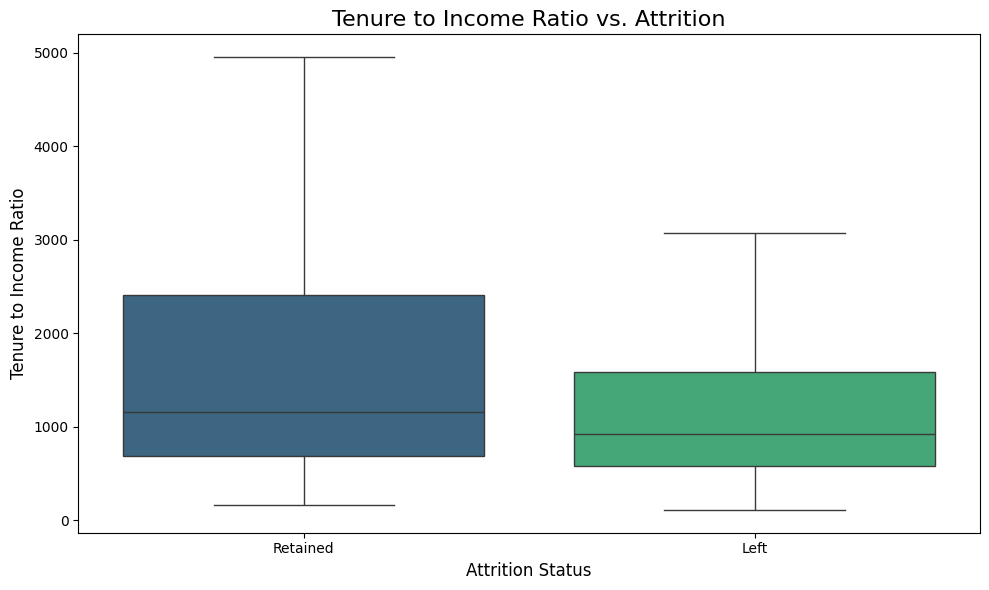

In [32]:
plt.figure(figsize=(10, 6))  # Sets the size of the plot.

sns.boxplot(
    x='Attrition',  # The x-axis represents the 'Attrition' column (whether the employee left or stayed).
    y='TenureToIncome',  # The y-axis represents the 'TenureToIncome' column (income to tenure ratio).
    data=df,  # Uses the 'df' DataFrame for the data.
    palette='viridis',  # Sets the color palette to 'viridis'.
    showfliers=False  # Hides the outliers to focus on the main distribution of data.
)

plt.title('Tenure to Income Ratio vs. Attrition', fontsize=16)  # Adds a title to the plot with a specific font size.
plt.xlabel('Attrition Status', fontsize=12)  # Labels the x-axis with a specific font size.
plt.ylabel('Tenure to Income Ratio', fontsize=12)  # Labels the y-axis with a specific font size.
plt.xticks(ticks=[0, 1], labels=['Retained', 'Left'])  # Sets custom labels for the x-axis ticks.
plt.tight_layout()  # Adjusts the layout to avoid overlap of elements.
plt.show()  # Displays the plot.

In [33]:
high_attrition_roles = ['Laboratory Technician', 'Sales Executive']  # List of job roles with high attrition risk.

df['HighRiskRole'] = df['JobRole'].apply(lambda x: 1 if x in high_attrition_roles else 0)  
# Creates a new column 'HighRiskRole' that assigns 1 if the 'JobRole' is in the high_attrition_roles list, else assigns 0.

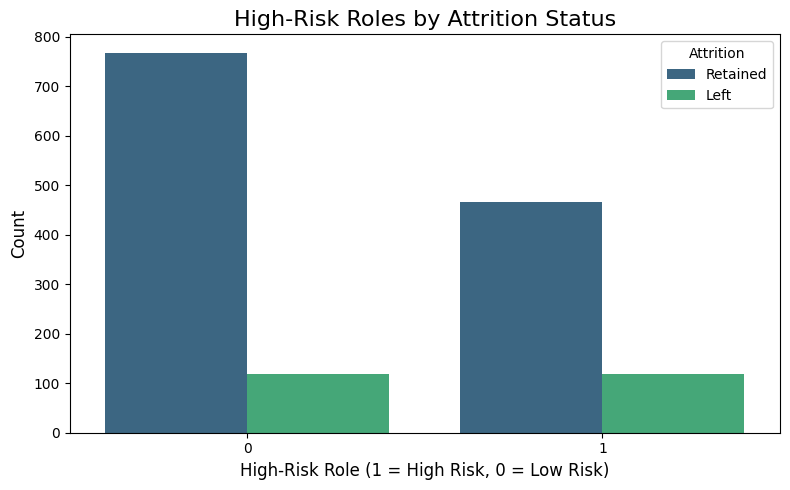

In [34]:
plt.figure(figsize=(8, 5))  # Sets the size of the plot.

sns.countplot(
    x='HighRiskRole',  # The x-axis represents the 'HighRiskRole' column (1 for high risk, 0 for low risk).
    hue='Attrition',  # The bars are grouped by 'Attrition' (whether the employee left or stayed).
    data=df,  # Uses the 'df' DataFrame for the data.
    palette='viridis'  # Sets the color palette to 'viridis'.
)

plt.title('High-Risk Roles by Attrition Status', fontsize=16)  # Adds a title to the plot with a specific font size.
plt.xlabel('High-Risk Role (1 = High Risk, 0 = Low Risk)', fontsize=12)  # Labels the x-axis with a description.
plt.ylabel('Count', fontsize=12)  # Labels the y-axis with a specific font size.
plt.legend(title='Attrition', labels=['Retained', 'Left'])  # Customizes the legend labels for attrition status.
plt.tight_layout()  # Adjusts the layout to avoid overlap of elements.
plt.show()  # Displays the plot.


In [35]:
bins = [18, 25, 35, 45, 60]  # Defines the age ranges for each group (e.g., 18-24, 25-34, etc.).
labels = ['Young (18-24)', 'Early Career (25-34)', 'Mid Career (35-44)', 'Senior (45-60)']  # Labels for each age group.

df['Age_Group'] = pd.cut(
    df['Age'],  # The 'Age' column is used to assign individuals to groups.
    bins=bins,  # Specifies the bins or ranges to categorize the ages into.
    labels=labels,  # Assigns the corresponding labels to the age groups.
    include_lowest=True  # Ensures the lowest age (18) is included in the first bin.
)

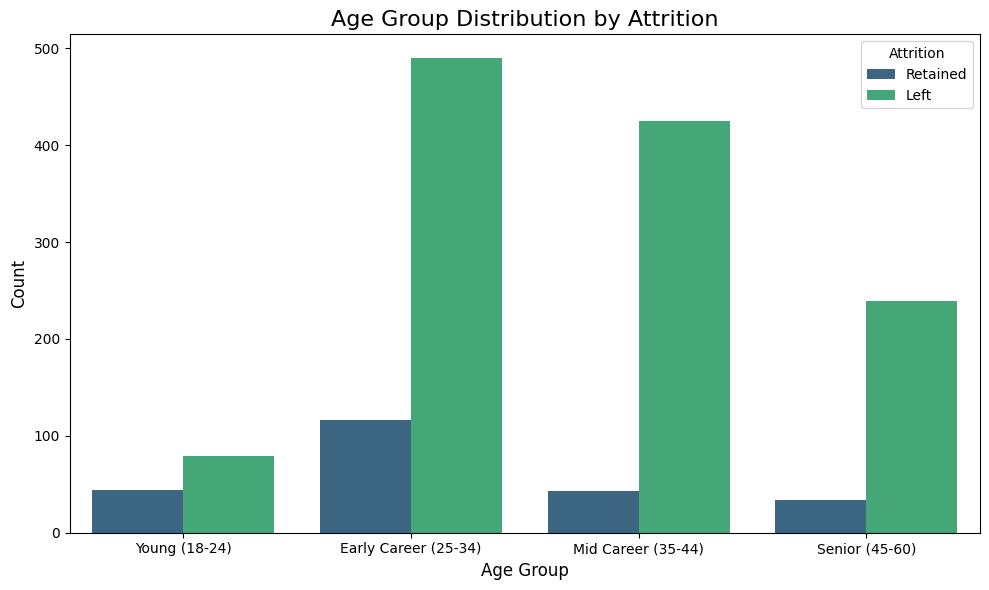

In [36]:
plt.figure(figsize=(10, 6))  # Sets the size of the plot.

sns.countplot(
    x='Age_Group',  # The x-axis represents the 'Age_Group' column (categorized age groups).
    hue='Attrition',  # The bars are grouped by 'Attrition' (whether the employee stayed or left).
    data=df,  # Uses the 'df' DataFrame for the data.
    palette='viridis'  # Sets the color palette to 'viridis'.
)

plt.title('Age Group Distribution by Attrition', fontsize=16)  # Adds a title to the plot with a specific font size.
plt.xlabel('Age Group', fontsize=12)  # Labels the x-axis with 'Age Group'.
plt.ylabel('Count', fontsize=12)  # Labels the y-axis with 'Count'.
plt.legend(title='Attrition', labels=['Retained', 'Left'])  # Customizes the legend labels for attrition status.
plt.tight_layout()  # Adjusts the layout to avoid overlap of elements.
plt.show()  # Displays the plot.

In [37]:
# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix (optional for debugging)
corr_matrix


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


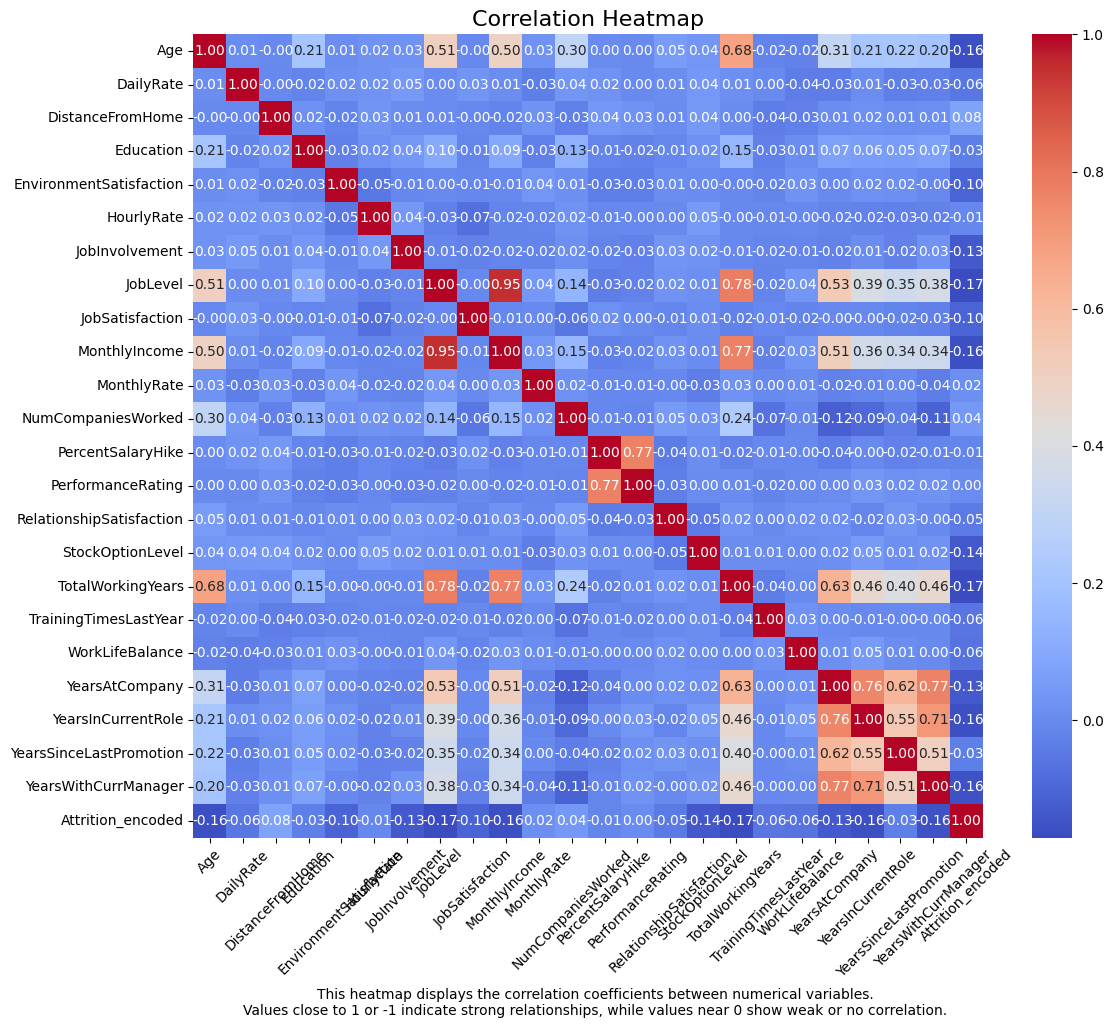

In [38]:
plt.figure(figsize=(12, 10))  # Sets the size of the figure for better visibility of the heatmap.

sns.heatmap(
    corr_matrix,  # The correlation matrix to visualize.
    annot=True,   # Display the correlation values on the heatmap.
    cmap='coolwarm',  # Uses the 'coolwarm' color scheme for the heatmap.
    fmt='.2f'     # Formats the correlation values to show two decimal places.
)

plt.title("Correlation Heatmap", fontsize=16)  # Sets the title of the heatmap with a font size of 16.
plt.xticks(rotation=45, fontsize=10)  # Rotates the x-axis labels by 45 degrees and sets font size to 10.
plt.yticks(rotation=0, fontsize=10)  # Sets the y-axis labels with no rotation and font size of 10.

plt.tight_layout()  # Adjusts the layout of the plot to prevent overlapping of elements.

# Adds a description below the heatmap explaining the meaning of correlation coefficients.
plt.figtext(
    0.5, -0.02,  # Positioning the text at the center horizontally and just below the heatmap.
    "This heatmap displays the correlation coefficients between numerical variables.\n"
    "Values close to 1 or -1 indicate strong relationships, while values near 0 show weak or no correlation.",
    ha="center",  # Centers the text horizontally.
    fontsize=10  # Sets the font size for the description.
)

plt.show()  # Displays the heatmap with all the settings applied.